<a href="https://colab.research.google.com/github/TanD18/Object-Detection/blob/main/Object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

In [ ]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 
import copy

##Loading Image

In [ ]:
img=cv2.imread('flam.jpeg')
#convert BGR image to RGB
imgRGB=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#convert BGR image to HSV
imgHSV=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
#Get gray image from RGB image
imgGrayRGB=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#Getting h,s,v value separately
h, s, v1 = cv2.split(imgHSV)

In [ ]:
#Setting up different configuration for canny edge detection
CannyInputList=[imgGrayRGB,imgGrayRGB,h]
edgeThresh_min_list=[255,300,9]
edgeThresh_max_list=[300,400,15]
dilation_iter_list=[1,0,1]
boxes=[]                                  #List for Bounding boxes

##Bounding box

  Get bounding bounding boxes for different contours in the passed image whose area is between 2000 and 40000

In [ ]:
#Get Bounding boxes for the contours whose area is between 2000 and 40000
def getBoxes(img,boxes):
  contours,heirarchy=cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
  for cnt in contours:
    area=cv2.contourArea(cnt)
    if area>2000:
      if area<40000:
        approx=cv2.approxPolyDP(cnt,0.05,True)
        x_,y_,w_,h_=cv2.boundingRect(approx)
        box=[x_,y_,x_+w_,y_+h_]
        boxes.append(box)
  return boxes

##Non Maximum Suppression

In [ ]:
#Non-Maximum Suppression
def NMS(boxes, overlapThresh):
    #return an empty list, if no boxes given
    if len(boxes) == 0:
        return []
    
    x1 = boxes[:, 0]  # x coordinate of the top-left corner
    y1 = boxes[:, 1]  # y coordinate of the top-left corner
    x2 = boxes[:, 2]  # x coordinate of the bottom-right corner
    y2 = boxes[:, 3]  # y coordinate of the bottom-right corner

    # compute the area of the bounding boxes and sort the bounding  boxes by the bottom-right y-coordinate of the bounding box
    areas = (x2 - x1 + 1) * (y2 - y1 + 1)      # We have a least a box of one pixel, therefore the +1
    indices = np.arange(len(x1))

    for i,box in enumerate(boxes):
        temp_indices = indices[indices!=i]
        xx1 = np.maximum(box[0], boxes[temp_indices,0])
        yy1 = np.maximum(box[1], boxes[temp_indices,1])
        xx2 = np.minimum(box[2], boxes[temp_indices,2])
        yy2 = np.minimum(box[3], boxes[temp_indices,3])
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        # compute the ratio of overlap
        overlap = (w * h) / areas[temp_indices]

        if max(overlap) > overlapThresh:
          indices = indices[indices != i]

    return boxes[indices].astype(int)

#Roadmap



1.   Get different(3) cannyedge detected images through different configuration of Threshold values and input image forms

2.   Get contours for the 3 different canny detected images. 

3.   Eliminate contours whose are is outside the range: 2000-40000
4.   Accumulate bounding boxes for all the contours of each canny detected image

5.   Apply Non-Maximum Suppression for bounding boxes with High IOU
6.   Display Final Bounding Boxes over input image







Text(0.5, 1.0, 'Bounding Box Detection')

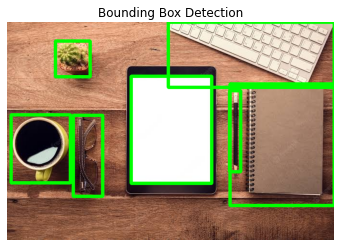

In [ ]:
for i in range(3):
  imgCanny=cv2.Canny(CannyInputList[i],edgeThresh_min_list[i],edgeThresh_max_list[i])
  kernel=np.ones((5,5))
  imgDil=cv2.dilate(imgCanny,kernel,iterations=dilation_iter_list[i])
  boxes=getBoxes(imgDil,boxes)
boxes=np.array(boxes)
overlapThreshold=0.96
final_boxes = NMS(boxes,overlapThreshold)   

for i in range(len(final_boxes)): 
  cv2.rectangle(imgRGB,(final_boxes[i][0],final_boxes[i][1]),(final_boxes[i][2],final_boxes[i][3]),(0,255,0),5)                                      # remove redundant bounding boxes

plt.imshow(imgRGB)
plt.axis("off")
plt.title("Bounding Box Detection")